In [1]:
# Import libraries
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the data
traindf = pd.read_csv("sign_mnist_train.csv")
testdf = pd.read_csv("sign_mnist_test.csv")

In [3]:
traindf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
testdf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
# Seperate out features and target
x_train = traindf.drop(['label'], axis = 1)
x_test = testdf.drop(['label'],axis=1)
y_train = traindf['label']
y_test= testdf['label']

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Count')]

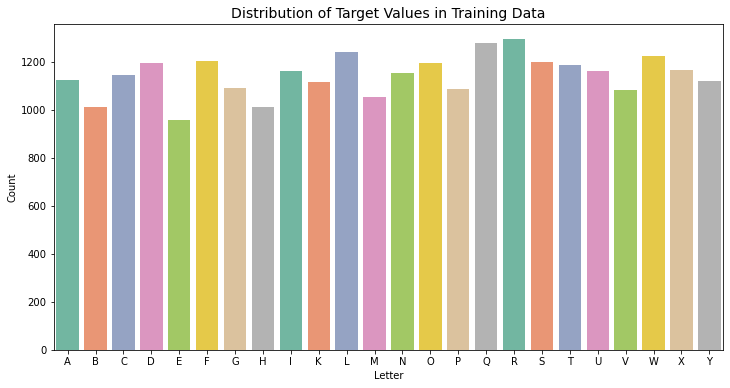

In [26]:
# Look at the distribution of target classes in training data
plt.figure(figsize = (12,6))
plt.title("Distribution of Target Values in Training Data", fontsize=14)
g = sns.countplot(x = y_train, palette="Set2")
g.set_xticklabels(["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"])
g.set(xlabel='Letter', ylabel='Count')

<AxesSubplot:xlabel='label', ylabel='count'>

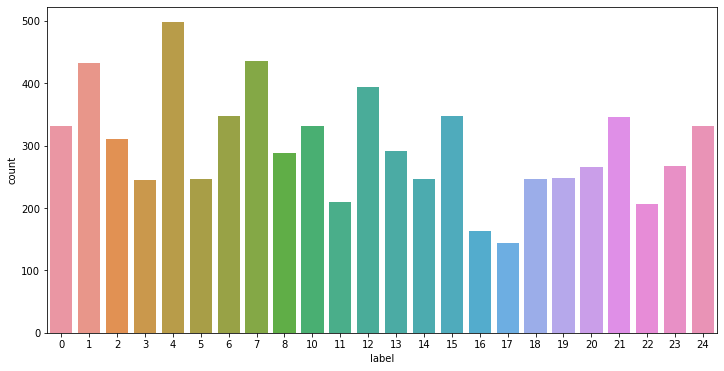

In [23]:
# Look at the distribution of target classes in test data
plt.figure(figsize = (12,6))
sns.countplot(x = y_test)

In [27]:
# Convert data to np.array
x_train = x_train.values
x_test = x_test.values

In [28]:
# Reshaping the images
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [29]:
# Set aside a validation set
x_val = x_train[:7455]
partial_x_train = x_train[7455:]
y_val = y_train[:7455]
partial_y_train = y_train[7455:]

In [30]:
# check the shape of the data
print("All Training Data:", x_train.shape, y_train.shape)
print("Partial Training Data:", partial_x_train.shape, partial_y_train.shape)
print("Validation Data:", x_val.shape, y_val.shape)
print("Test Data:", x_test.shape, y_test.shape)

All Training Data: (27455, 28, 28, 1) (27455,)
Partial Training Data: (20000, 28, 28, 1) (20000,)
Validation Data: (7455, 28, 28, 1) (7455,)
Test Data: (7172, 28, 28, 1) (7172,)


In [ ]:
# Possibly need to convert target to categorical here
# y_train = to_categorical(y_train, num_classes = 25)
# partial_y_train = to_categorical(partial_y_train, num_classes = 25)
# y_val = to_categorical(y_val, num_classes = 25)
# y_test = to_categorical(y_test, num_classes = 25)

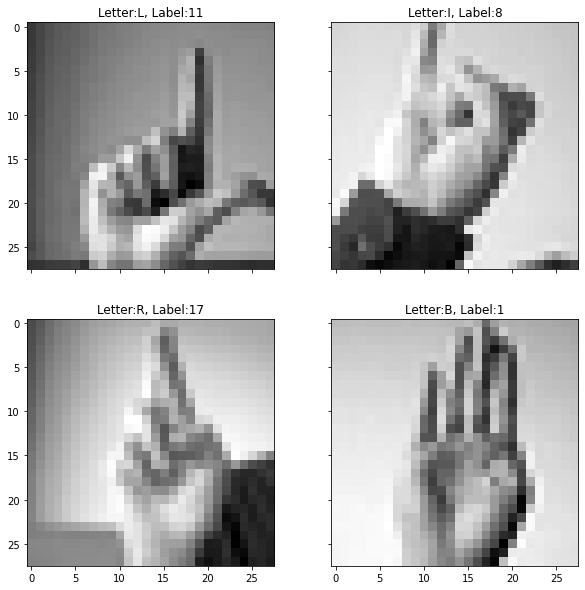

In [10]:
# Look at a sample image
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(partial_x_train[0], cmap = 'gray')
axs[0, 0].set_title('Letter:L, Label:11')
axs[0, 1].imshow(partial_x_train[1], cmap = 'gray')
axs[0, 1].set_title('Letter:I, Label:8')
axs[1, 0].imshow(partial_x_train[2], cmap = 'gray')
axs[1, 0].set_title('Letter:R, Label:17')
axs[1, 1].imshow(partial_x_train[3], cmap = 'gray')
axs[1, 1].set_title('Letter:B, Label:1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [13]:
# Verify that the target lines up with the sample image
partial_y_train.head(4) # The image is letter L, which correlates to a target of 11

7455    11
7456     8
7457    17
7458     1
Name: label, dtype: int64

In [10]:
# Create the CNN model
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(25, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         590336    
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0     

In [12]:
# Train the model on the data
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64, 
                    validation_data=(x_val, y_val))

Epoch 1/10
313/313 [==============================] - 16s 50ms/step - loss: 3.1074 - accuracy: 0.4167 - val_loss: 0.0733 - val_accuracy: 0.9732
Epoch 2/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0984 - accuracy: 0.9697 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 3/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0237 - accuracy: 0.9936 - val_loss: 0.0305 - val_accuracy: 0.9934
Epoch 4/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0693 - accuracy: 0.9818 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0218 - accuracy: 0.9945 - val_loss: 8.6969e-04 - val_accuracy: 0.9999
Epoch 6/10
313/313 [==============================] - 14s 45ms/step - loss: 0.0490 - accuracy: 0.9892 - val_loss: 5.0939e-04 - val_accuracy: 1.0000
Epoch 7/10
313/313 [==============================] - 14s 45ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0083 - val_a

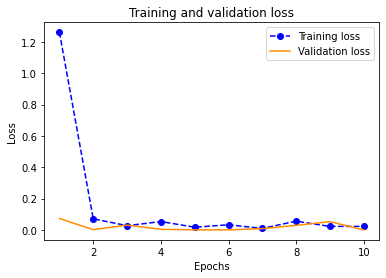

In [13]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "--bo", label="Training loss")
plt.plot(epochs, val_loss_values, "darkorange", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

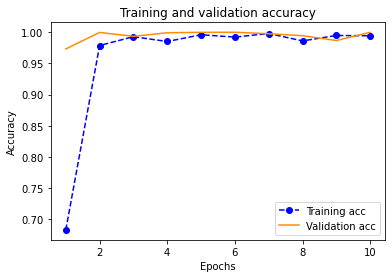

In [14]:
# Plot training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "--bo", label="Training acc")
plt.plot(epochs, val_acc, "darkorange", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [11]:
# Retrain the model from scratch using the optimum number of epochs
# It appears the model begins to overfit almost immediately, so I am choosing to run only 2 epochs
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=64)

Epoch 1/2
429/429 [==============================] - 19s 44ms/step - loss: 3.6273 - accuracy: 0.4631
Epoch 2/2
429/429 [==============================] - 18s 41ms/step - loss: 0.0325 - accuracy: 0.9908


In [12]:
# Evaluate model performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

225/225 [==============================] - 2s 7ms/step - loss: 0.3817 - accuracy: 0.9207
Test accuracy: 0.921


**Results Visualizations**

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

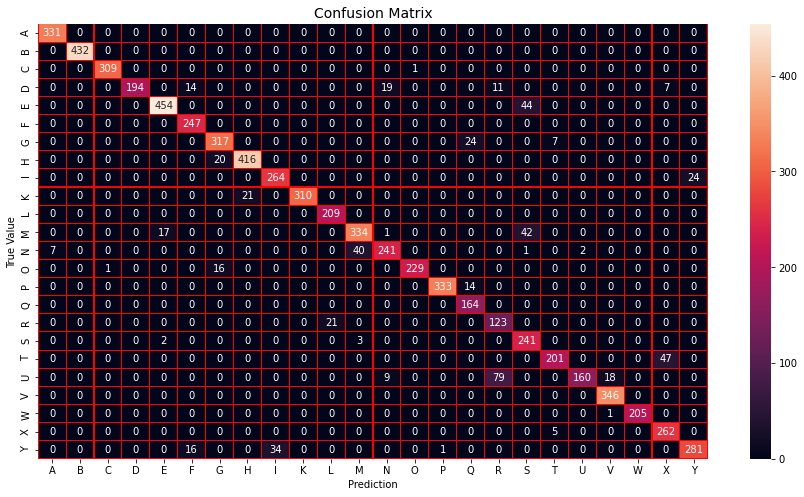

In [14]:
# Create a confusion matrix displaying true values against predicted values

getChar = lambda x: "ABCDEFGHIKLMNOPQRSTUVWXY"[x]

y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

f, ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,
            annot=True,
            linewidths=0.005,
            linecolor="red",
            fmt=".0f",
            ax=ax,
            xticklabels=[getChar(x) for x in range(24)],
            yticklabels=[getChar(x) for x in range(24)]
           )

plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      0.79      0.88       245
           4       0.96      0.91      0.94       498
           5       0.89      1.00      0.94       247
           6       0.90      0.91      0.90       348
           7       0.95      0.95      0.95       436
           8       0.89      0.92      0.90       288
          10       1.00      0.94      0.97       331
          11       0.91      1.00      0.95       209
          12       0.89      0.85      0.87       394
          13       0.89      0.83      0.86       291
          14       1.00      0.93      0.96       246
          15       1.00      0.96      0.98       347
          16       0.81      1.00      0.90       164
          17       0.58      0.85      0.69       144
          18       0.73    

In [16]:
# Prepare the data to display in classifcation report heatmap
target_names = list("ABCDEFGHIKLMNOPQRSTUVWXY")
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

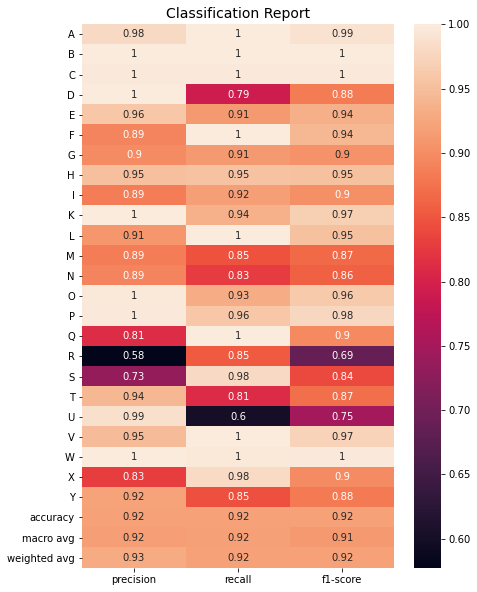

In [17]:
# Plot the classification report heatmap
f, ax=plt.subplots(figsize=(7,10))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report", fontsize=14)
plt.show()